#UNI Machine Learning Course
#Lab 07:  Red neuronal artificial  (ANN) y Intro a Deep learning

Pasos para crear una ANN

1.   Crear las capas e inicialización de parámetros.
2.   Forward propagation
3.   Funcion de perdida y funcion de costo.
4.   Backpropropagation
5.   Actualización de parámetros
6.   Predicción con parámetros aprendidos.



In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import warnings
# filter warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
# load dataset
dataset = tf.keras.datasets.mnist

(X_train, Y_train) , (X_test, Y_test) = dataset.load_data()
#img_size = 28*28

print("x_train shape:", X_train.shape, "y_train shape:", Y_train.shape)
print("x_test shape:", X_test.shape, "y_test shape:", Y_test.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,)
x_test shape: (10000, 28, 28) y_test shape: (10000,)


In [2]:
number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]
X_train_flatten = X_train.reshape(number_of_train,X_train.shape[1]*X_train.shape[2])
X_test_flatten = X_test .reshape(number_of_test,X_test.shape[1]*X_test.shape[2])
print("X train flatten",X_train_flatten.shape)
print("X test flatten",X_test_flatten.shape)


Y_train_flatten = Y_train.reshape(number_of_train,1)
Y_test_flatten = Y_test .reshape(number_of_test,1)
print("X train flatten",Y_train_flatten.shape)
print("X test flatten",Y_test_flatten.shape)

X train flatten (60000, 784)
X test flatten (10000, 784)
X train flatten (60000, 1)
X test flatten (10000, 1)


In [3]:
x_train = X_train_flatten.T
x_test = X_test_flatten.T
y_train = Y_train_flatten.T
y_test = Y_test_flatten.T

print("x train: ",x_train.shape)
print("y train: ",y_train.shape)

print("x test: ",x_test.shape)
print("y test: ",y_test.shape)

x train:  (784, 60000)
y train:  (1, 60000)
x test:  (784, 10000)
y test:  (1, 10000)


## Red neuronal artificial de 2 capaz

## Inicializar parametros y tamanos de layer.


In [0]:
def set_parameters_and_layer_sizes(x_train, y_train):
    parameters = {"weight1": np.random.randn(3,x_train.shape[0]) * 0.5,
                  "bias1": np.zeros((3,1)),
                  "weight2": np.random.randn(y_train.shape[0],3) * 0.5,
                  "bias2": np.zeros((y_train.shape[0],1))}
    return parameters
  
def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head

##Forward propagation

In [0]:
def forward_propagation(x_train, parameters):

    Z1 = np.dot(parameters["weight1"],x_train) +parameters["bias1"]
    A1 = np.tanh(Z1)
    Z2 = np.dot(parameters["weight2"],A1) + parameters["bias2"]
    A2 = sigmoid(Z2)

    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

## Calcular costo

In [0]:
def compute_cost(A2, Y, parameters):
    logprobs = np.multiply(np.log(A2),Y)
    cost = -np.sum(logprobs)/Y.shape[1]
    return cost

## Backward Propagation

In [0]:
def backward_propagation(parameters, cache, X, Y):

    dZ2 = cache["A2"]-Y
    dW2 = np.dot(dZ2,cache["A1"].T)/X.shape[1]
    db2 = np.sum(dZ2,axis =1,keepdims=True)/X.shape[1]
    dZ1 = np.dot(parameters["weight2"].T,dZ2)*(1 - np.power(cache["A1"], 2))
    dW1 = np.dot(dZ1,X.T)/X.shape[1]
    db1 = np.sum(dZ1,axis =1,keepdims=True)/X.shape[1]
    grads = {"dweight1": dW1,
             "dbias1": db1,
             "dweight2": dW2,
             "dbias2": db2}
    return grads
  
  

## Actualización de parámetros

In [0]:
def update_parameters(parameters, grads, learning_rate = 0.05):
    parameters = {"weight1": parameters["weight1"]-learning_rate*grads["dweight1"],
                  "bias1": parameters["bias1"]-learning_rate*grads["dbias1"],
                  "weight2": parameters["weight2"]-learning_rate*grads["dweight2"],
                  "bias2": parameters["bias2"]-learning_rate*grads["dbias2"]}
    
    return parameters

## Predicción con parámetros aprendidos.

In [0]:
# prediction
def predictNN(parameters,x_test):
    # x_test is a input for forward propagation
    A2, cache = forward_propagation(x_test,parameters)
    Y_prediction = np.zeros((1,x_test.shape[1]))

    for i in range(A2.shape[1]):
        if A2[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

## Corriendo la  neural network

Costo despues iteracion 0: 5.962629
Costo despues iteracion 100: 0.000610
Costo despues iteracion 200: 0.001013


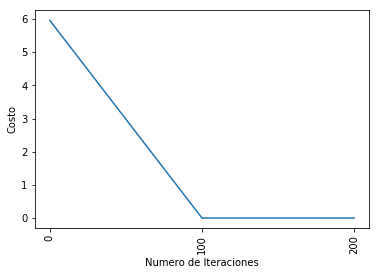

Error en train: -265.02333333333337 %
Error en test: -263.8 %


In [10]:
def ANN_2_layer(x_train, y_train,x_test,y_test, iteraciones):
    cost_list = []
    index_list = []
    #initializar parametros
    parameters = set_parameters_and_layer_sizes(x_train, y_train)

    for i in range(0, iteraciones):
         # Forward propagation
        A2, cache = forward_propagation(x_train,parameters)
        # Calcular costo
        cost = compute_cost(A2, y_train, parameters)
         # Backward propagation
        grads = backward_propagation(parameters, cache, x_train, y_train)
         # Actualizar parametros
        parameters = update_parameters(parameters, grads)
        
        if i % 100 == 0:
            cost_list.append(cost)
            index_list.append(i)
            print ("Costo despues iteracion %i: %f" %(i, cost))
    plt.plot(index_list,cost_list)
    plt.xticks(index_list,rotation='vertical')
    plt.xlabel("Numero de Iteraciones")
    plt.ylabel("Costo")
    plt.show()
    
    # predecir
    y_prediction_test = predictNN(parameters,x_test)
    y_prediction_train = predictNN(parameters,x_train)

    # Errors
    print("Error en train: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("Error en test: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    return parameters, y_prediction_test

parameters = ANN_2_layer(x_train, y_train,x_test,y_test, iteraciones=300)

# Intro a Deep Learning

## THE MNIST DATABASE of handwritten digits

 
The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.
It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting.

http://yann.lecun.com/exdb/mnist/

In [11]:
#import tensorflow.keras as keras

import tensorflow as tf

print(tf.__version__)

1.14.0


In [12]:
import matplotlib.pyplot as plt

dataset = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = dataset.load_data()
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape, "y_test shape:", y_test.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,)
x_test shape: (10000, 28, 28) y_test shape: (10000,)


In [13]:
print(x_train.shape[0], 'train set')
print(x_test.shape[0], 'test set')

60000 train set
10000 test set


In [14]:
N_index=6000
print(x_train[N_index,:])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  59 200
  255 229   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  50 200 253
  251 102   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  59 236 254 224
   98   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   4  21 236 254 217  74
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  70 254 253 252  67   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  11 192 254 253 10

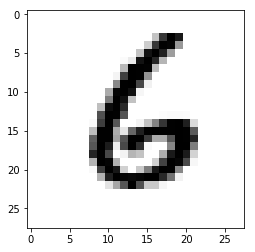

In [15]:
plt.imshow(x_train[N_index],cmap=plt.cm.binary)
plt.show()

In [0]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

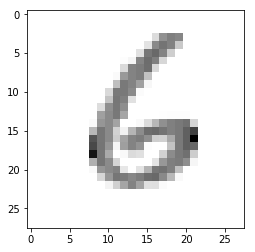

In [17]:
plt.imshow(x_train[N_index],cmap=plt.cm.binary)
plt.show()

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

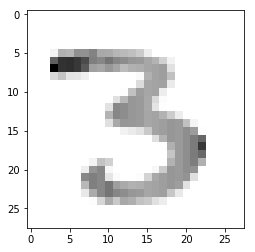

In [18]:
print(x_train[12])

plt.imshow(x_train[12],cmap=plt.cm.binary)
plt.show()

### Referencia de modelos https://keras.io/models/about-keras-models/

In [0]:
modelo = tf.keras.models.Sequential()

In [0]:
modelo.add(tf.keras.layers.Flatten())

In [21]:
#https://keras.io/activations/
modelo.add(tf.keras.layers.Dense(128, activation=tf.nn.softmax))

W0701 22:26:41.881986 140510311200640 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
modelo.add(tf.keras.layers.Dense(256, activation=tf.nn.relu))  
modelo.add(tf.keras.layers.Dense(256, activation=tf.nn.relu)) 
modelo.add(tf.keras.layers.Dense(256, activation=tf.nn.relu))  
modelo.add(tf.keras.layers.Dense(256, activation=tf.nn.relu)) 
modelo.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))  

 

modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [23]:
modelo.fit(x_train, y_train, epochs=20) 


Epoch 1/20
60000/60000 [==============================] - 10s 161us/sample - loss: 0.4810 - acc: 0.8426
Epoch 2/20
60000/60000 [==============================] - 10s 158us/sample - loss: 0.1696 - acc: 0.9504
Epoch 3/20
60000/60000 [==============================] - 10s 159us/sample - loss: 0.1234 - acc: 0.9635
Epoch 4/20
60000/60000 [==============================] - 10s 166us/sample - loss: 0.0973 - acc: 0.9717
Epoch 5/20
60000/60000 [==============================] - 10s 162us/sample - loss: 0.0796 - acc: 0.9767
Epoch 6/20
60000/60000 [==============================] - 10s 159us/sample - loss: 0.0664 - acc: 0.9808
Epoch 7/20
60000/60000 [==============================] - 9s 157us/sample - loss: 0.0567 - acc: 0.9833
Epoch 8/20
60000/60000 [==============================] - 9s 153us/sample - loss: 0.0495 - acc: 0.9858
Epoch 9/20
60000/60000 [==============================] - 9s 143us/sample - loss: 0.0425 - acc: 0.9877
Epoch 10/20
60000/60000 [==============================] - 10s 163u

In [24]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  100480    
_________________________________________________________________
dense_1 (Dense)              multiple                  33024     
_________________________________________________________________
dense_2 (Dense)              multiple                  65792     
_________________________________________________________________
dense_3 (Dense)              multiple                  65792     
_________________________________________________________________
dense_4 (Dense)              multiple                  65792     
_________________________________________________________________
dense_5 (Dense)              multiple                  2

In [25]:
val_loss, val_acc = modelo.evaluate(x_test, y_test)
print(val_loss)
print(val_acc)

10000/10000 [==============================] - 0s 49us/sample - loss: 0.2168 - acc: 0.9689
0.2167776170460689
0.9689


In [0]:
prediciones = modelo.predict(x_test)

In [27]:
print(prediciones)

[[1.1409702e-13 5.0943614e-18 6.7904742e-13 ... 1.0000000e+00
  3.4999296e-15 2.9544592e-10]
 [3.5466625e-14 2.1885699e-24 1.0000000e+00 ... 3.3557591e-23
  1.9872938e-18 3.4977394e-31]
 [0.0000000e+00 1.0000000e+00 4.0198223e-18 ... 2.1842651e-25
  8.9402771e-16 2.0722149e-24]
 ...
 [2.0362526e-34 4.4766741e-19 8.4781564e-23 ... 4.6673149e-24
  2.1822496e-25 7.7125690e-21]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  8.9558093e-31 1.5668761e-33]
 [3.7227786e-19 4.5283346e-28 1.3967147e-28 ... 1.4153250e-37
  1.0226351e-19 1.2743249e-30]]


In [28]:
mnist_labels = ["CERO",  "UNO", "DOS",  "TRES", "CUATRO",  "CINCO", "SEIS", "SIETE", "OCHO",  "NUEVE"] 
import numpy as np
N_predicion = 200
print(mnist_labels[np.argmax(prediciones[N_predicion])])

TRES


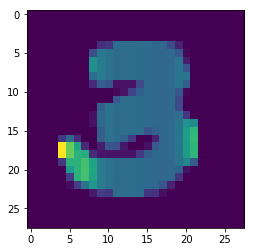

In [29]:
plt.imshow(x_test[N_predicion])
plt.show()

## THE Fashion-MNIST DATABASE

 
Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. We intend Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

https://github.com/zalandoresearch/fashion-mnist


Label Description
0 T-shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot

Each gray-scale image is 28x28

In [30]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

# Load fashion-mnist
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

4423680/4422102 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28) y_train shape: (60000,)


y = 8 Bolsa


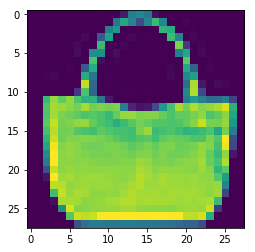

In [31]:
# Definir Etiquetas       0           1           2           3        4        5           6        7           8         9
fashion_mnist_labels = ["Camisa",  "Pantalon", "Chompa",  "Vestido", "Saco",  "Sandalia", "Polo", "Zapatilla", "Bolsa",  "Botas"]  

# Index de imagen -> 0 a 59,999
img_index = 100
# y_train tiene etiquetas de 0 a 9
label_index = y_train[img_index]
# Ejemplo
print ("y = " + str(label_index) + " " +(fashion_mnist_labels[label_index]))

plt.imshow(x_train[img_index])

In [32]:
print("Numbero de train set - " + str(len(x_train)))
print("Numbero de test set - " + str(len(x_test)))

Numbero de train set - 60000
Numbero de test set - 10000


In [0]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

#x_train = x_train.astype('float32') / 255
#x_test = x_test.astype('float32') / 255



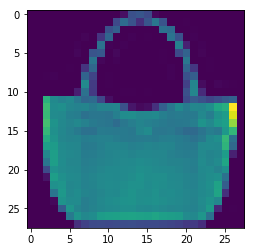

In [34]:
plt.imshow(x_train[img_index])

In [35]:
# poner 5000 en el set de validacion y usar el resto 55,000 para train)
(x_train, x_valid) = x_train[5000:], x_train[:5000] 
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# Reshape data de entrada de (28, 28) to (28, 28, 1)
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_valid = x_valid.reshape(x_valid.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

# One-hot encode (etiquetas)
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)


print(x_train.shape[0], 'train set')
print(x_valid.shape[0], 'validation set')
print(x_test.shape[0], 'test set')

x_train shape: (55000, 28, 28, 1) y_train shape: (55000, 10)
55000 train set
5000 validation set
10000 test set


In [36]:
model = tf.keras.Sequential()


model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))


model.summary()



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)             

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [38]:
from tensorflow.keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
#filepath="weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"
#checkpointer = ModelCheckpoint(filepath=filepath, verbose = 1, save_best_only=True)



model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(x_valid, y_valid))

Train on 55000 samples, validate on 5000 samples


Using TensorFlow backend.


Epoch 1/10
55000/55000 [==============================] - 74s 1ms/sample - loss: 0.6239 - acc: 0.7652 - val_loss: 0.3846 - val_acc: 0.8594
Epoch 2/10
55000/55000 [==============================] - 73s 1ms/sample - loss: 0.4284 - acc: 0.8427 - val_loss: 0.3420 - val_acc: 0.8772
Epoch 3/10
55000/55000 [==============================] - 73s 1ms/sample - loss: 0.3857 - acc: 0.8573 - val_loss: 0.2983 - val_acc: 0.8928
Epoch 4/10
55000/55000 [==============================] - 73s 1ms/sample - loss: 0.3599 - acc: 0.8675 - val_loss: 0.2871 - val_acc: 0.8932
Epoch 5/10
55000/55000 [==============================] - 74s 1ms/sample - loss: 0.3410 - acc: 0.8733 - val_loss: 0.2752 - val_acc: 0.8958
Epoch 6/10
55000/55000 [==============================] - 74s 1ms/sample - loss: 0.3241 - acc: 0.8806 - val_loss: 0.2641 - val_acc: 0.9016
Epoch 7/10
55000/55000 [==============================] - 75s 1ms/sample - loss: 0.3131 - acc: 0.8845 - val_loss: 0.2659 - val_acc: 0.9000
Epoch 8/10
55000/55000 [===

In [39]:
val_loss, val_acc = model.evaluate(x_test, y_test, verbose=0)

print(val_loss)
print(val_acc)

0.268301521396637
0.8992


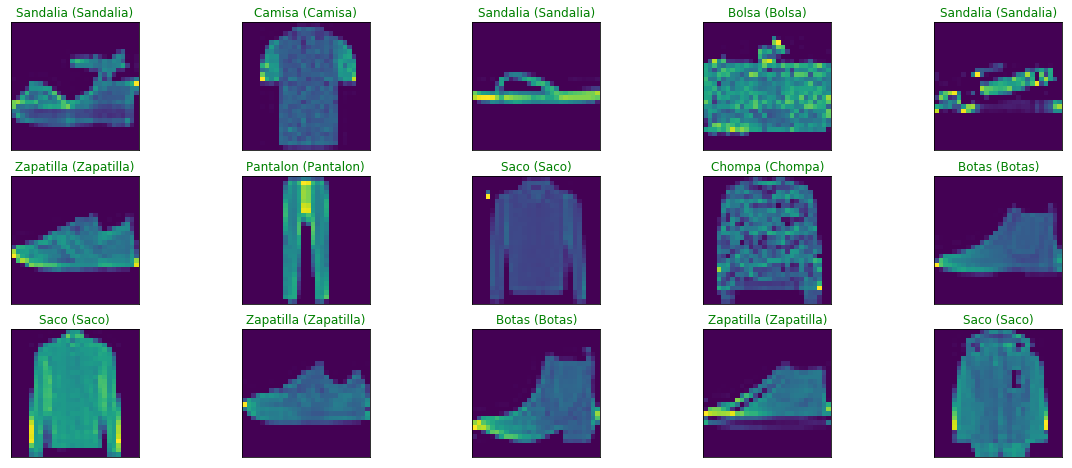

In [40]:
prediccion = model.predict(x_test)

# Graficar una muestra aleatoria de 10 imagenes de prueba, sus etiquetas predecidas y las reales
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Mostrar cada imagen
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(prediccion[index])
    true_index = np.argmax(y_test[index])
    # Poner el titulo a cada imagen
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))